In [16]:
import os
import cv2
import numpy as np


parent_dir = '/Users/saikarthik/Desktop/scp/dataset'


categories = os.listdir(parent_dir)


category_images = {}
category_labels = {}


for category in categories:
    category_dir = os.path.join(parent_dir, category)
    

    if os.path.isdir(category_dir) and category != '.DS_Store':
        all_files = os.listdir(category_dir)
        image_files = [filename for filename in all_files if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
        images = []  # An empty list to store the processed images for the current category
        labels = [category] * len(image_files)
        

        for image_file in image_files:
            image_path = os.path.join(category_dir, image_file)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting to RGB format
            resized_image = cv2.resize(image_rgb, (224, 224))  # Resizing the image to a 224x224 pixel size
            images.append(resized_image)
    
        category_images[category] = np.array(images)
        category_labels[category] = np.array(labels)

        print(f"Shape of images for category '{category}': {category_images[category].shape}")


Shape of images for category 'VeryMildDemented': (2308, 224, 224, 3)
Shape of images for category 'ModerateDemented': (132, 224, 224, 3)
Shape of images for category 'MildDemented': (964, 224, 224, 3)
Shape of images for category 'NonDemented': (3268, 224, 224, 3)


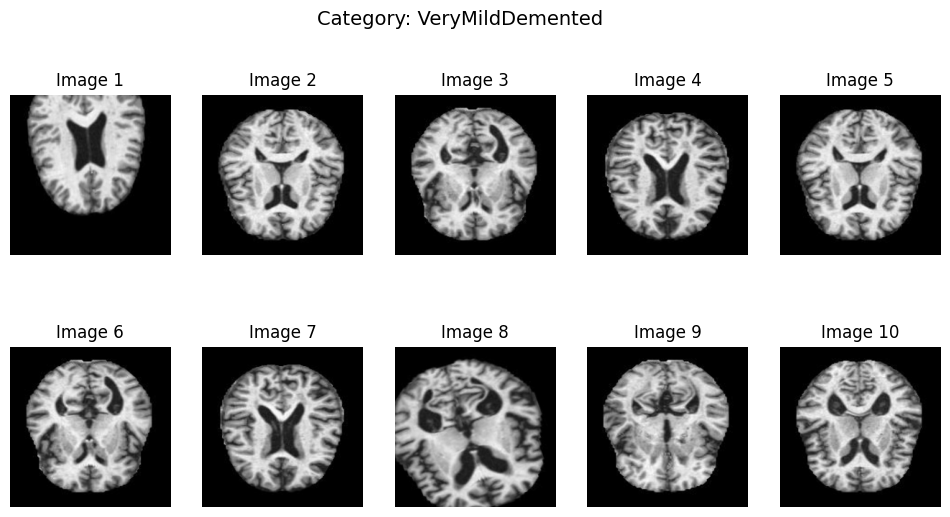

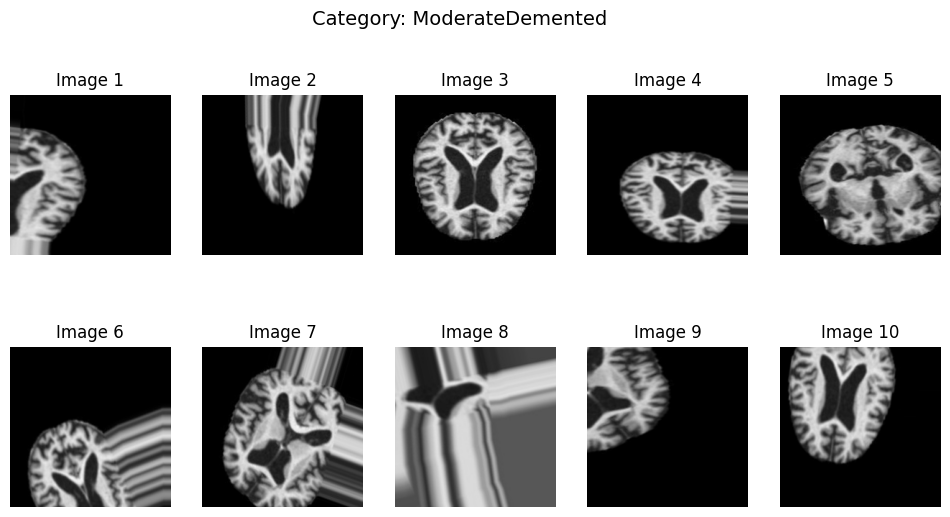

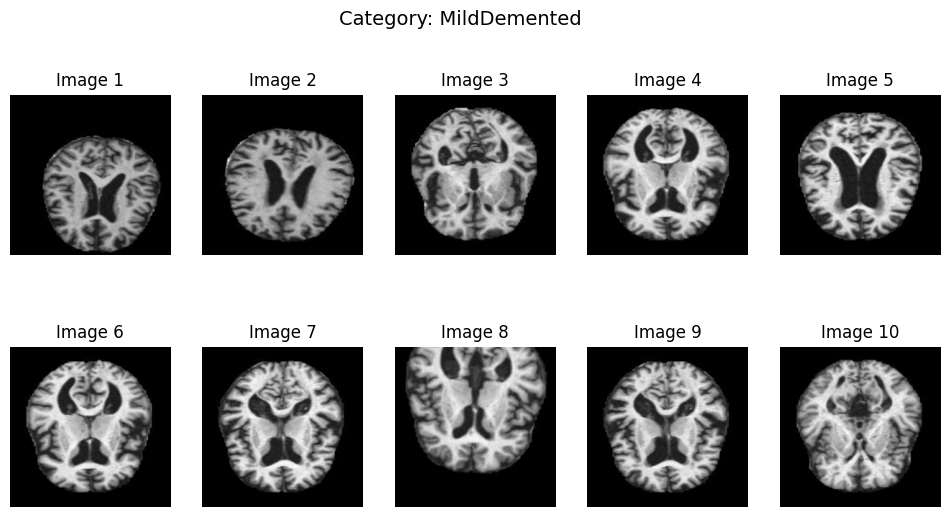

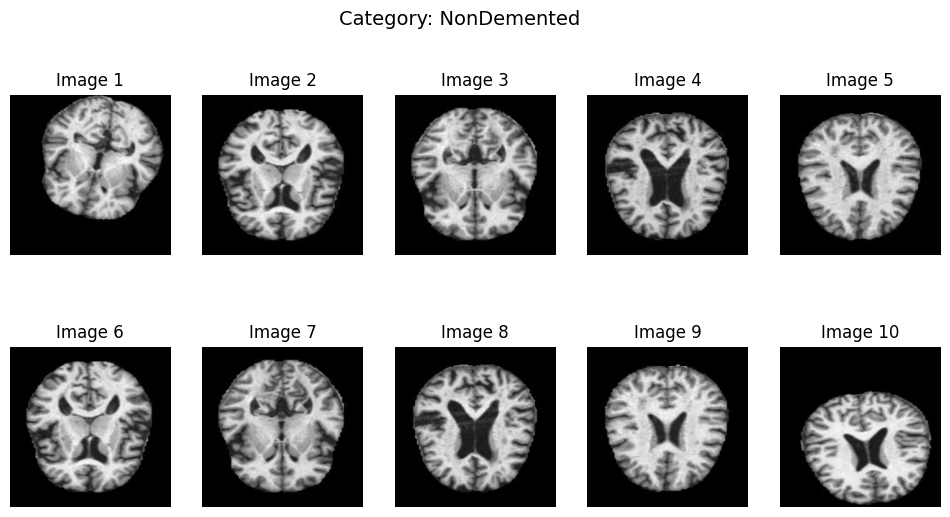

In [17]:
import matplotlib.pyplot as plt


for category in categories:
    if category not in category_images:
        continue
    
    sample_images = category_images[category][:10]  # Taking the first 10 images as a sample

    plt.figure(figsize=(12, 6))
    for i in range(len(sample_images)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(sample_images[i])
        plt.title(f"Image {i+1}")
        plt.axis('off')
    plt.suptitle(f"Category: {category}", fontsize=14)
    plt.show()


In [18]:

for category in category_images:
    category_images[category] = category_images[category] / 255.0


min_value = np.min(category_images[category])
max_value = np.max(category_images[category])


print(f"Minimum Pixel Value: {min_value}")
print(f"Maximum Pixel Value: {max_value}")


Minimum Pixel Value: 0.0
Maximum Pixel Value: 1.0


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotating the image by up to 20 degrees
    width_shift_range=0.2,  # Shifting the width by up to 20% of the image width
    height_shift_range=0.2,  # Shifting the height by up to 20% of the image height
    shear_range=0.2, 
    zoom_range=0.2,  # Zoom in by up to 20%
    horizontal_flip=True,  # Fliping the image horizontally
    fill_mode='nearest'  # Fill in new pixels with the nearest existing pixel
)

output_dir = '/Users/saikarthik/Desktop/scp/dataset'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for category in categories:
    if category not in category_images:
        continue

    images = category_images[category]
    category_output_dir = os.path.join(output_dir, category)
    if not os.path.exists(category_output_dir):
        os.makedirs(category_output_dir)
    i = 0
    for batch in datagen.flow(images, batch_size=1):
        augmented_image = batch[0]
        augmented_image = (augmented_image * 255).astype(np.uint8)  
        filename = f'{i}.jpg' 
        save_path = os.path.join(category_output_dir, filename)
        cv2.imwrite(save_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
        i += 1
        if i >= 100:  
            break


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import cv2
import os

# Ensure the output directory exists
output_dir = '/Users/saikarthik/Desktop/scp/dataug_outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Helper function to create directories
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Function to apply a single augmentation and save sample outputs
def perform_augmentation(operation_name, datagen, images, category, sample_count=5):
    print(f"Performing: {operation_name}")
    category_output_dir = os.path.join(output_dir, category, operation_name)
    create_dir(category_output_dir)
    i = 0
    for batch in datagen.flow(images, batch_size=1):
        augmented_image = batch[0]
        augmented_image = (augmented_image * 255).astype(np.uint8)
        filename = f'{i}.jpg'
        save_path = os.path.join(category_output_dir, filename)
        cv2.imwrite(save_path, cv2.cvtColor(augmented_image, cv2.COLOR_RGB2BGR))
        print(f"Saved: {save_path}")
        i += 1
        if i >= sample_count:  # Limit to sample_count images
            break

# Individual augmentations
augmentations = {
    "rotation": ImageDataGenerator(rotation_range=20),
    "width_shift": ImageDataGenerator(width_shift_range=0.2),
    "height_shift": ImageDataGenerator(height_shift_range=0.2),
    "shear": ImageDataGenerator(shear_range=0.2),
    "zoom": ImageDataGenerator(zoom_range=0.2),
    "horizontal_flip": ImageDataGenerator(horizontal_flip=True),
}

# Process each category
for category in categories:
    if category not in category_images:
        continue

    images = category_images[category]

    # Perform individual augmentations
    for operation_name, datagen in augmentations.items():
        perform_augmentation(operation_name, datagen, images, category, sample_count=5)

    # Final combined augmentation
    combined_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    perform_augmentation("final_combined", combined_datagen, images, category, sample_count=10)


Performing: rotation
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/rotation/0.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/rotation/1.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/rotation/2.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/rotation/3.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/rotation/4.jpg
Performing: width_shift
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/width_shift/0.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/width_shift/1.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/width_shift/2.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/width_shift/3.jpg
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/width_shift/4.jpg
Performing: height_shift
Saved: /Users/saikarthik/Desktop/scp/dataug_outputs/VeryMildDemented/height

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input


base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

feature_extractor = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)


parent_dir = '/Users/saikarthik/Desktop/scp/dataset'

categories = os.listdir(parent_dir)


category_features = {}
category_labels = {}

for category in categories:
    category_dir = os.path.join(parent_dir, category)
    

    if os.path.isdir(category_dir) and category != '.DS_Store':
        all_files = os.listdir(category_dir)
        
        image_files = [filename for filename in all_files if filename.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        features = []  
        labels = [category] * len(image_files)
        
    
        for image_file in image_files:
            image_path = os.path.join(category_dir, image_file)
            image = cv2.imread(image_path)
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
            resized_image = cv2.resize(image_rgb, (224, 224))  
            preprocessed_image = preprocess_input(np.expand_dims(resized_image, axis=0))  
            features.append(feature_extractor.predict(preprocessed_image)[0])  
        

        category_features[category] = np.array(features)
        category_labels[category] = np.array(labels)




2024-11-22 11:09:12.466648: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-11-22 11:09:12.467164: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-11-22 11:09:12.467342: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-11-22 11:09:12.467837: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-11-22 11:09:12.468234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


1/1 [==============================] - 0s 13ms/step


2024-11-22 11:09:13.307163: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 11ms/step


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.applications import MobileNetV3Small, preprocess_input

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

layer_names = [layer.name for layer in base_model.layers if 'conv' in layer.name or 'pool' in layer.name]

intermediate_models = [Model(inputs=base_model.input, outputs=base_model.get_layer(name).output) for name in layer_names]

parent_dir = '/Users/saikarthik/Desktop/scp/dataset'

categories = [category for category in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, category))]

print(f"Categories found: {categories}")

for category in categories:
    category_dir = os.path.join(parent_dir, category)
    
    image_files = [f for f in os.listdir(category_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    print(f"Category: {category}, Number of images: {len(image_files)}")
    
    if not image_files:
        print(f"  No valid images found in {category}. Skipping.")
        continue

    image_path = os.path.join(category_dir, image_files[0])
    image = cv2.imread(image_path)

    if image is None:
        print(f"  Unable to read {image_path}. Skipping.")
        continue

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image_rgb, (224, 224))
    preprocessed_image = preprocess_input(np.expand_dims(resized_image, axis=0))

    print(f"Category: {category}, Representative Image: {image_files[0]}")
    for model, name in zip(intermediate_models, layer_names):
        output = model.predict(preprocessed_image)
        print(f"    Layer: {name}, Output shape: {output.shape}")
    print("-" * 50) 


Categories found: ['VeryMildDemented', 'ModerateDemented', 'MildDemented', 'NonDemented']
Category: VeryMildDemented, Number of images: 2308
Category: VeryMildDemented, Representative Image: 63.jpg
1/1 [==============================] - 0s 30ms/step
    Layer: block1_conv1, Output shape: (1, 224, 224, 64)
1/1 [==============================] - 0s 34ms/step
    Layer: block1_conv2, Output shape: (1, 224, 224, 64)
1/1 [==============================] - 0s 34ms/step


2024-11-22 11:14:29.449408: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:29.506900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:29.605411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: block1_pool, Output shape: (1, 112, 112, 64)
1/1 [==============================] - 0s 46ms/step
    Layer: block2_conv1, Output shape: (1, 112, 112, 128)
1/1 [==============================] - 0s 51ms/step
    Layer: block2_conv2, Output shape: (1, 112, 112, 128)
1/1 [==============================] - 0s 51ms/step


2024-11-22 11:14:29.662755: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:29.732458: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:29.808006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: block2_pool, Output shape: (1, 56, 56, 128)
1/1 [==============================] - 0s 60ms/step
    Layer: block3_conv1, Output shape: (1, 56, 56, 256)
1/1 [==============================] - 0s 66ms/step
    Layer: block3_conv2, Output shape: (1, 56, 56, 256)


2024-11-22 11:14:29.882953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:29.968977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 102ms/step
    Layer: block3_conv3, Output shape: (1, 56, 56, 256)
1/1 [==============================] - 0s 72ms/step


2024-11-22 11:14:30.089078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:30.180522: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:30.275278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: block3_conv4, Output shape: (1, 56, 56, 256)
1/1 [==============================] - 0s 80ms/step
    Layer: block3_pool, Output shape: (1, 28, 28, 256)
1/1 [==============================] - 0s 80ms/step
    Layer: block4_conv1, Output shape: (1, 28, 28, 512)
1/1 [==============================] - 0s 87ms/step


2024-11-22 11:14:30.375890: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:30.479187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: block4_conv2, Output shape: (1, 28, 28, 512)
1/1 [==============================] - 0s 95ms/step
    Layer: block4_conv3, Output shape: (1, 28, 28, 512)
1/1 [==============================] - 0s 102ms/step


2024-11-22 11:14:30.588038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:30.707666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: block4_conv4, Output shape: (1, 28, 28, 512)
1/1 [==============================] - 0s 129ms/step
    Layer: block4_pool, Output shape: (1, 14, 14, 512)
1/1 [==============================] - 0s 108ms/step


2024-11-22 11:14:30.861543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:30.981239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


    Layer: block5_conv1, Output shape: (1, 14, 14, 512)
1/1 [==============================] - 0s 114ms/step
    Layer: block5_conv2, Output shape: (1, 14, 14, 512)


2024-11-22 11:14:31.109883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:31.245472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 123ms/step
    Layer: block5_conv3, Output shape: (1, 14, 14, 512)
1/1 [==============================] - 0s 123ms/step
    Layer: block5_conv4, Output shape: (1, 14, 14, 512)


2024-11-22 11:14:31.388269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-11-22 11:14:31.530699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 128ms/step
    Layer: block5_pool, Output shape: (1, 7, 7, 512)
--------------------------------------------------
Category: ModerateDemented, Number of images: 132
Category: ModerateDemented, Representative Image: 63.jpg
1/1 [==============================] - 0s 11ms/step
    Layer: block1_conv1, Output shape: (1, 224, 224, 64)
1/1 [==============================] - 0s 12ms/step
    Layer: block1_conv2, Output shape: (1, 224, 224, 64)
1/1 [==============================] - 0s 11ms/step
    Layer: block1_pool, Output shape: (1, 112, 112, 64)
1/1 [==============================] - 0s 11ms/step
    Layer: block2_conv1, Output shape: (1, 112, 112, 128)
1/1 [==============================] - 0s 11ms/step
    Layer: block2_conv2, Output shape: (1, 112, 112, 128)
1/1 [==============================] - 0s 12ms/step
    Layer: block2_pool, Output shape: (1, 56, 56, 128)
1/1 [==============================] - 0s 12ms/step
    Layer: block3_conv1, Output

In [8]:
all_features = np.concatenate(list(category_features.values()))
all_labels = np.concatenate(list(category_labels.values()))

In [9]:
all_features

array([[[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        , 17.63176   , ...,  0.        ,
           0.        ,  0.        ],
         [25.721445  ,  3.4103017 , 18.141897  , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 0.        ,  0.        , 10.03678   , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  5.104447  , ...,  0.        ,
           0.        ,  6.5907445 ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]],

        [[ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [15.165916  ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         ...,
         [ 1.2026811 ,  0.        

In [10]:
all_labels

array(['VeryMildDemented', 'VeryMildDemented', 'VeryMildDemented', ...,
       'NonDemented', 'NonDemented', 'NonDemented'], dtype='<U16')

In [11]:
from sklearn.preprocessing import StandardScaler
import numpy as np
num_samples = all_features.shape[0]
all_features_reshaped = all_features.reshape(num_samples, -1)

scaler = StandardScaler()
all_features = scaler.fit_transform(all_features_reshaped)




In [12]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
all_labels = one_hot_encoder.fit_transform(all_labels_encoded.reshape(-1, 1))


In [13]:
all_features

array([[-0.01224347, -0.02482893, -0.03605263, ..., -0.01718192,
        -0.04646849, -0.06235819],
       [-0.01224347, -0.02482893, -0.03605263, ..., -0.01718192,
        -0.04646849, -0.06235819],
       [-0.01224347, -0.02482893, -0.03605263, ..., -0.01718192,
        -0.04646849, -0.06235819],
       ...,
       [-0.01224347, -0.02482893, -0.03605263, ..., -0.01718192,
        -0.04646849, -0.06235819],
       [-0.01224347, -0.02482893, -0.03605263, ..., -0.01718192,
        -0.04646849, -0.06235819],
       [-0.01224347, -0.02482893, -0.03605263, ..., -0.01718192,
        -0.04646849, -0.06235819]], dtype=float32)

In [14]:
all_labels

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]])

In [15]:
np.save('all_features_vgg19.npy', all_features)

np.save('all_labels_vgg19.npy', all_labels)



